# Denoising a signal using FFT


## Import modules

In [96]:
import numpy as np
import matplotlib.pyplot as plt
import IPython

plt.rcParams['figure.figsize'] = (12, 3)
plt.rcParams['font.size'] = 8

%matplotlib inline

## Generate a signal and corrupt it with noise

In [97]:
dt = 0.001
TONE1 = 50
TONE2 = 120

t = np.arange(0, 1, dt)
x = np.sin(2 * np.pi * TONE1 * t) + np.sin(2 * np.pi * TONE2 * t)

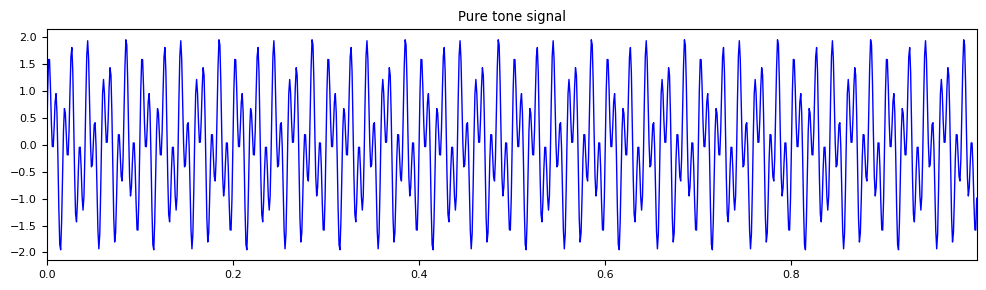

In [99]:
plt.plot(t, x, linewidth=1.0, color='b')
plt.title('Pure tone signal');
plt.xlim(t[0], t[-1]);

In [86]:
x_hat = x + 2.5 * np.random.randn(len(t))

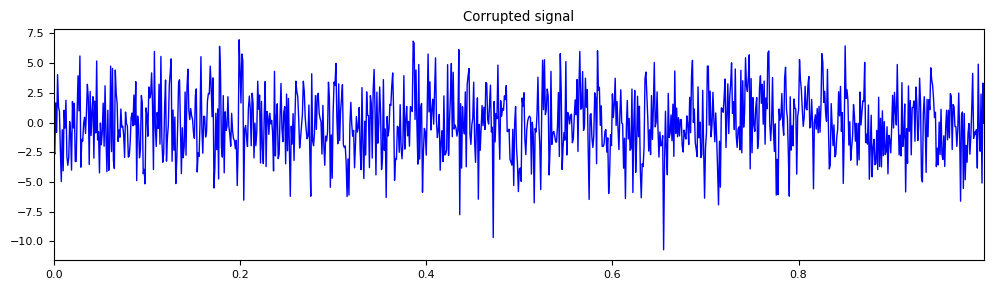

In [100]:
plt.plot(t, x_hat, linewidth=1.0, color='b')
plt.title('Corrupted signal');
plt.xlim(t[0], t[-1]);

## Taking the FFT

In [73]:
N = len(t)
X = np.fft.fft(x_hat, N)

spectrum = X * np.conj(X) / N
freq = 1 / (dt * N) * np.arange(N)
L = np.arange(1, np.floor(N/2), dtype='int')

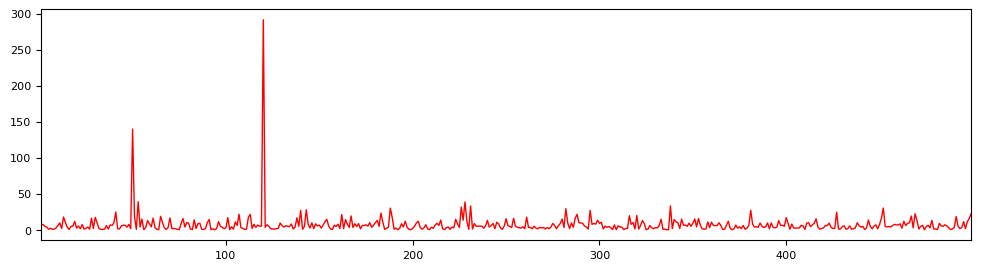

In [102]:
plt.plot(freq[L], spectrum[L], linewidth=1.0, color='r');
plt.xlim(freq[L[0]], freq[L[-1]])
plt.show()

## Filtering noise

In [103]:
indices = spectrum > 100
filtered = spectrum * indices
X = X * indices
filtered_signal = np.fft.ifft(X)

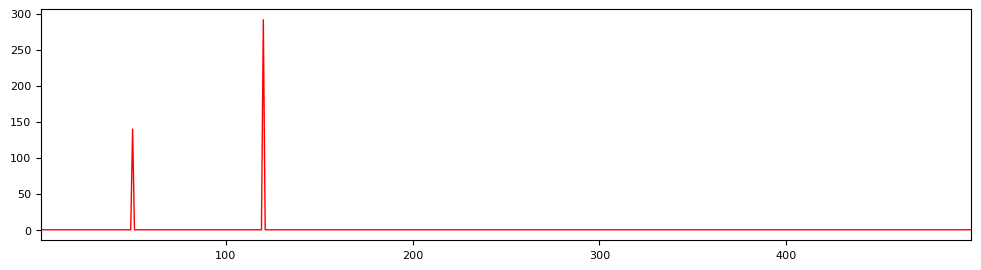

In [104]:
plt.plot(freq[L], filtered[L], linewidth=1.0, color='r');
plt.xlim(freq[L[0]], freq[L[-1]])
plt.show()

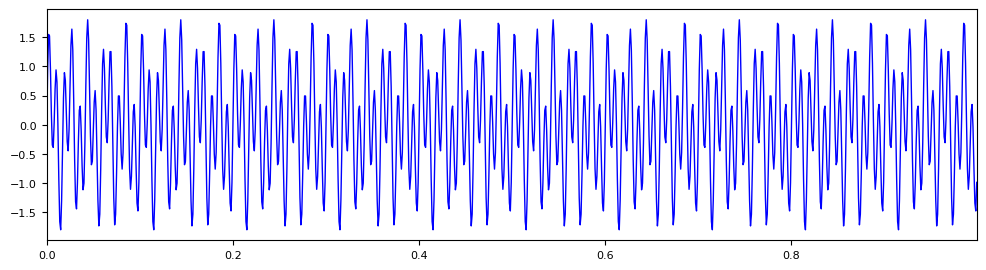

In [105]:
plt.plot(t, filtered_signal, linewidth=1.0, color='b');
plt.xlim(t[0], t[-1])
plt.show()